In [104]:
import nltk
import string

In [90]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
file = "//home//vinicius//Data_Science//Notebooks//Data_Files//smsspamcollection//SMSSpamCollection"

In [139]:
df1 = pd.read_table(file, names=['Label', 'Message'])

In [140]:
df1.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
df1.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [96]:
df1.groupby('Label').Message.count()

Label
ham     4825
spam     747
Name: Message, dtype: int64

In [141]:
df1['Lenght'] = df1['Message'].apply(len) ##len in char of each msg

In [142]:
df1.head()

,Label,Message,Lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Text(0, 0.5, 'Frequency')

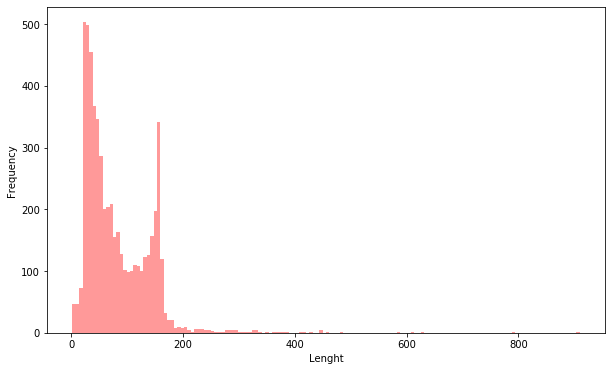

In [99]:
plt.figure(figsize=(10,6))
sns.distplot(df1.Lenght, kde=False, bins=150, color='Red')
plt.ylabel('Frequency')

In [100]:
df1.Lenght.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Lenght, dtype: float64

In [101]:
df1[df1['Lenght']==910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Text(0.02, 0.5, 'Frequency')

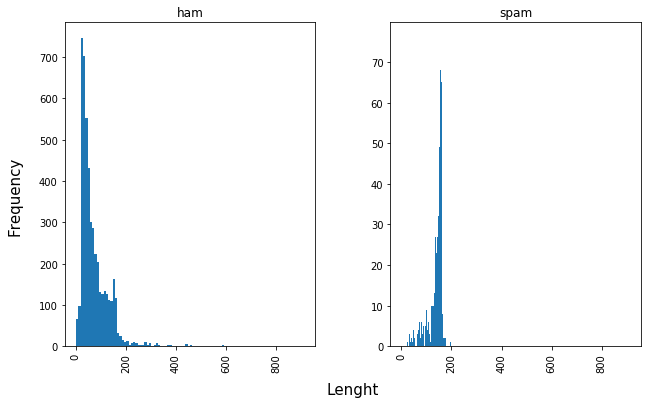

In [102]:
fig, axes = plt.subplots(ncols=2, sharex=True,sharey=False,figsize=(10,6))
df1.hist(bins=100, column='Lenght', by='Label', figsize=(10,6),ax=axes)
fig.text(0.5, 0.04, 'Lenght', ha='center', fontsize=15)
fig.text(0.02, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=15)

In [129]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [136]:
def clean_text(msg):
    ## Remove punctuations
    no_punc = [char for char in msg if char not in string.punctuation]
    ## Join to string again
    no_punc = ''.join(no_punc)
    ## Remove stop words
    clean = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [147]:
#bow_transformer = CountVectorizer(analyzer=clean_text).fit(df1['Message'])

In [150]:
#print(len(bow_transformer.vocabulary_))

11425


In [151]:
#msg_bow = bow_transformer.transform(df1['Message'])

In [153]:
print(msg_bow.shape)
print(msg_bow.nnz) ## number of non zeros

(5572, 11425)
50548


In [158]:
sparcity = (100 * msg_bow.nnz/(msg_bow.shape[0]*msg_bow.shape[1]))
print("Sparcity:",sparcity)

Sparcity: 0.07940295412668218


In [173]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [174]:
msg_train, msg_test, label_train, label_test = train_test_split(df1['Message'], df1['Label'], test_size=0.2)

In [176]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=clean_text)), 
                     ('tfidf',TfidfTransformer()), 
                     ('classifier', MultinomialNB())])

In [177]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x7fa01c98bb90>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [178]:
pred = pipeline.predict(msg_test)

In [179]:
from sklearn.metrics import classification_report

In [180]:
print(classification_report(pred,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1012
        spam       0.70      1.00      0.82       103

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115



**Precision = 97%**

**Using random forests to test**

In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=clean_text)), 
                     ('tfidf',TfidfTransformer()), 
                     ('classifier', RandomForestClassifier())])

In [183]:
pipeline.fit(msg_train, label_train)

/home/vinicius/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x7fa01c98bb90>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                              

In [184]:
pred = pipeline.predict(msg_test)

In [185]:
print(classification_report(pred,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1009
        spam       0.72      1.00      0.84       106

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.97      1115



**Same precision**